# Load the Dataset

In [1]:
import pandas as pd

# Load datasets

car_df = pd.read_csv("Car_Price_Dataset.csv")

print("car_price_dataset")
display(car_df.head())


car_price_dataset


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


# Perform Exploratory Data Analysis

In [2]:
print("Missing values in Car Price Dataset:")
print(car_df.isnull().sum())

Missing values in Car Price Dataset:
Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64


In [3]:
print("Car Price Data Types:\n", car_df.dtypes)

Car Price Data Types:
 Brand            object
Model            object
Year              int64
Engine_Size     float64
Fuel_Type        object
Transmission     object
Mileage           int64
Doors             int64
Owner_Count       int64
Price             int64
dtype: object


In [4]:
print("Car Price Dataset Statistics")
display(car_df.describe())

Car Price Dataset Statistics


,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


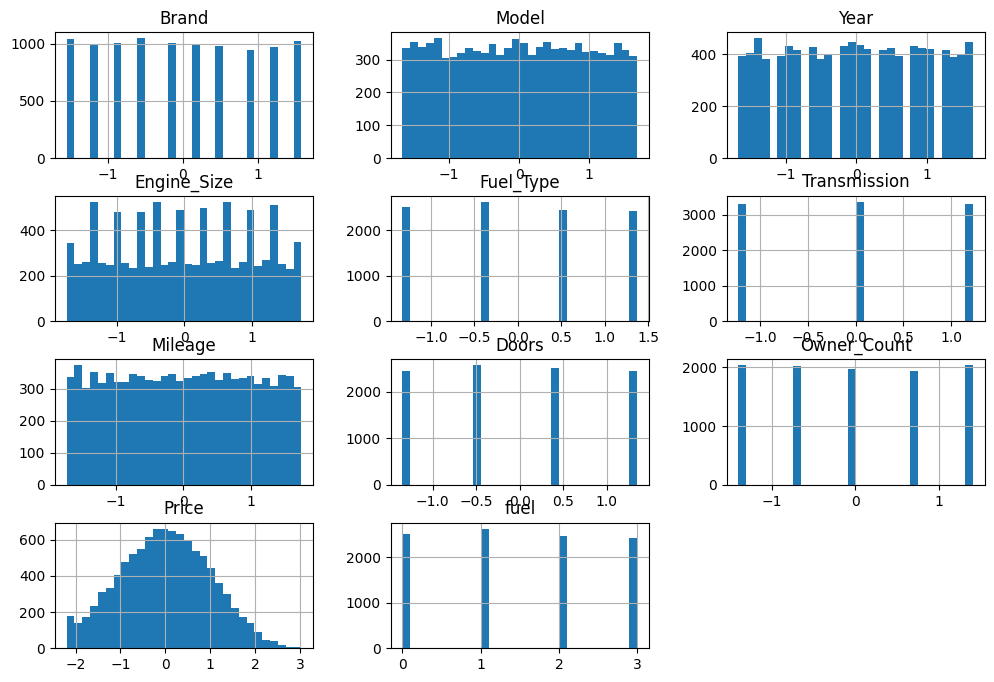

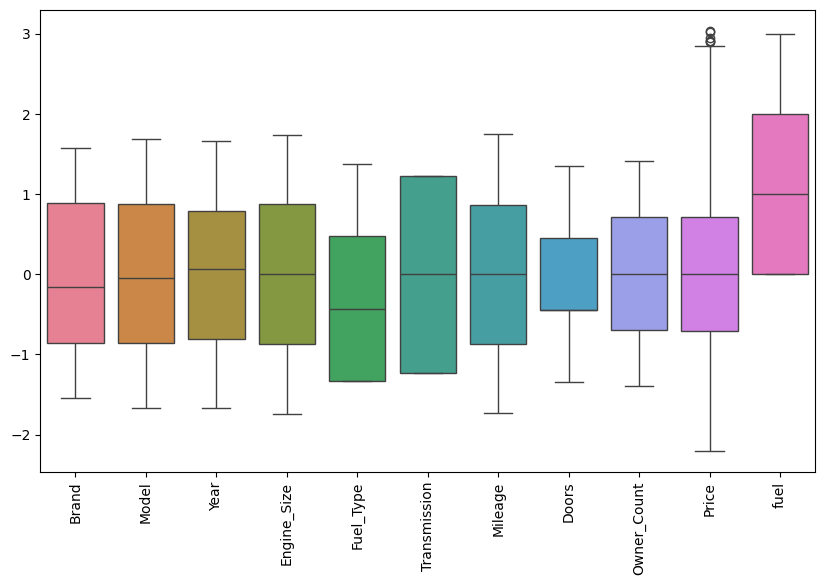

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for numerical features
car_df.hist(figsize=(12, 8), bins=30)
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(data=car_df)
plt.xticks(rotation=90)  # Rotate x labels for better visibility
plt.show()

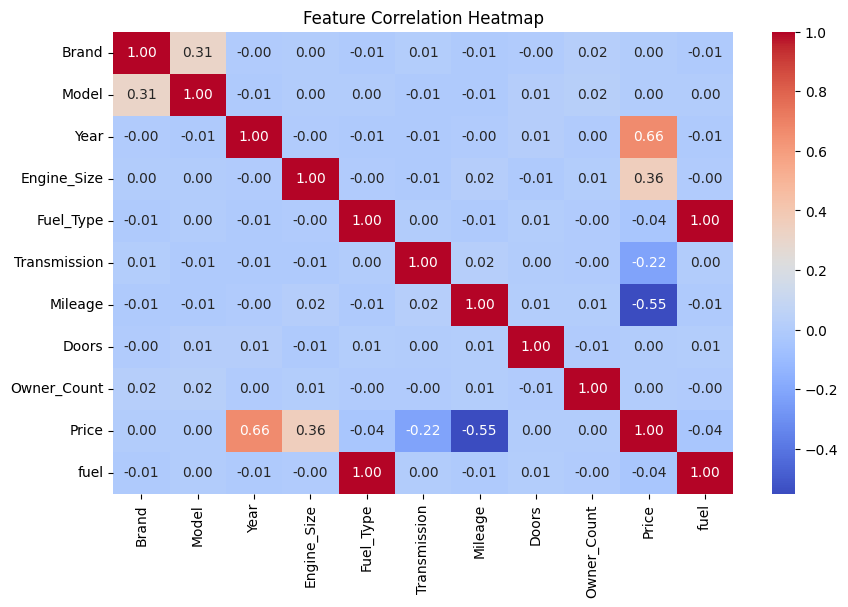

In [29]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(car_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()




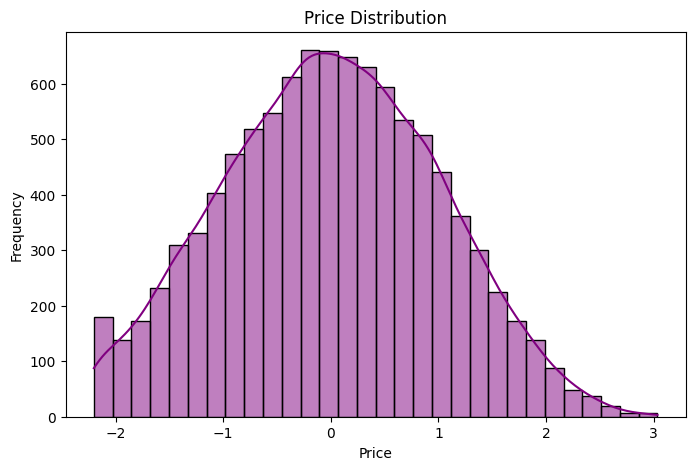

In [31]:
# Distribution of Price
plt.figure(figsize=(8,5))
sns.histplot(car_df['Price'], bins=30, kde=True, color="purple")
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()



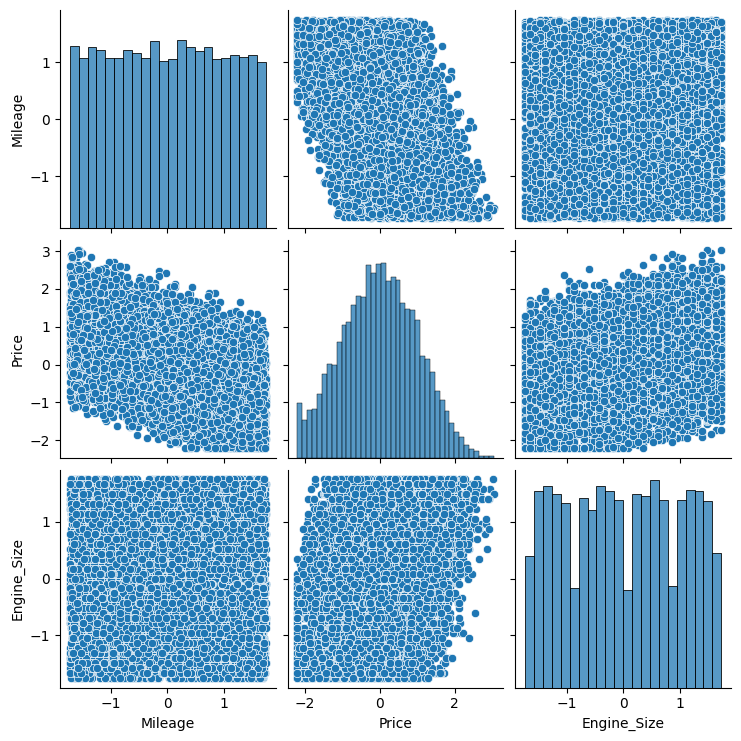

In [34]:
# Pairplot for relationships
sns.pairplot(car_df[['Mileage', 'Price', 'Engine_Size']])  # Adjust columns as needed
plt.show()

In [5]:
print("Duplicates in Car Price Dataset:", car_df.duplicated().sum())

Duplicates in Car Price Dataset: 0


# Handle Missing Values

In [6]:
# Drop columns with too many missing values
car_df.dropna(axis=1, thresh=int(0.6 * len(car_df)), inplace=True)  # Drops columns with more than 40% missing values

# Fill remaining missing values with mode
car_df.fillna(car_df.mode().iloc[0], inplace=True)

#  Encoding Categorical Variables

In [10]:
# Label encoding for ordinal variables (if any)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_columns = ['Fuel_Type', 'Brand', 'Transmission','Model']  # Adjust based on your dataset

for col in categorical_columns:
    if col in car_df.columns:
        car_df[col] = le.fit_transform(car_df[col])



# Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()  # Use MinMaxScaler() for min-max scaling

# Apply scaling

car_df.iloc[:, :-1] = scaler.fit_transform(car_df.iloc[:, :-1])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14284\1632907425.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.53632337 -0.8522161   0.88345824 ... -1.19935097 -0.50508123
  1.57772797]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  car_df.iloc[:, :-1] = scaler.fit_transform(car_df.iloc[:, :-1])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14284\1632907425.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.10749166  0.52904621  0.18197894 ... -1.6690465  -0.16508833
  1.45455893]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  car_df.iloc[:, :-1] = scaler.fit_transform(car_df.iloc[:, :-1])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14284\1632907425.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future 

# Split Dataset into Train-Test Sets

In [13]:
from sklearn.model_selection import train_test_split


# Split Car Price Dataset
X_car = car_df.drop(columns=['Price'])
y_car = car_df['Price']
X_train_car, X_test_car, y_train_car, y_test_car = train_test_split(X_car, y_car, test_size=0.2, random_state=42)


# Apply Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

def evaluate_model(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mae, mse, r2

# Test different train-test splits
splits = [0.3, 0.2, 0.1]

for split in splits:
    X_train, X_test, y_train, y_test = train_test_split(X_car, y_car, test_size=split, random_state=42)
    mae, mse, r2 = evaluate_model(X_train, X_test, y_train, y_test)
    print(f"Test Split {split}: MAE={mae}, MSE={mse}, R2={r2}")


Test Split 0.3: MAE=0.2563488678714869, MSE=0.0850689725630936, R2=0.9123604963843633
Test Split 0.2: MAE=0.2549372309447618, MSE=0.08450126364942681, R2=0.9109049829961208
Test Split 0.1: MAE=0.24926700864229082, MSE=0.08092800248235593, R2=0.9143601249034644


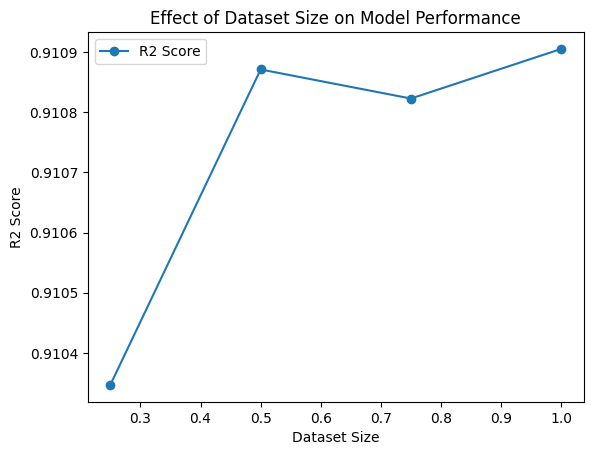

In [18]:
train_sizes = [0.25, 0.5, 0.75, 1.0]
results = []

for size in train_sizes:
    X_train_sub = X_train_car[:int(size * len(X_train_car))]
    y_train_sub = y_train_car[:int(size * len(y_train_car))]
    
    mae, mse, r2 = evaluate_model(X_train_sub, X_test_car, y_train_sub, y_test_car)
    results.append((size, mae, mse, r2))

# Plot Results
sizes, maes, mses, r2s = zip(*results)
plt.plot(sizes, r2s, marker='o', label="R2 Score")
plt.xlabel("Dataset Size")
plt.ylabel("R2 Score")
plt.title("Effect of Dataset Size on Model Performance")
plt.legend()
plt.show()


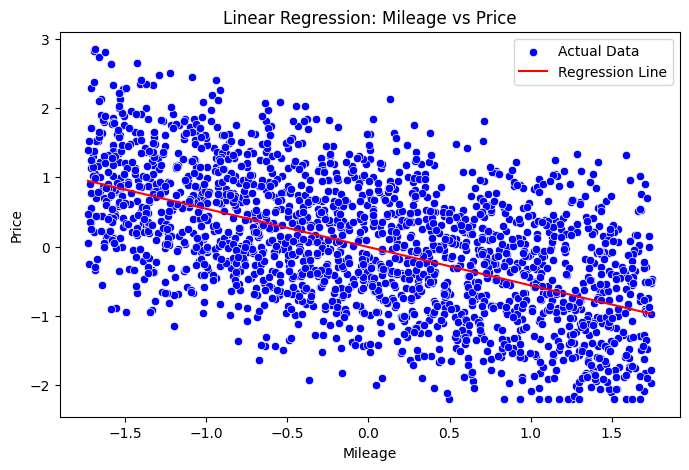

In [27]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



# Select features and target (Modify according to your dataset)
X = car_df[['Mileage']]  # Independent variable (Modify this)
y = car_df['Price']      # Dependent variable (Modify this)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Plot regression line
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test['Mileage'], y=y_test, color="blue", label="Actual Data")
sns.lineplot(x=X_test['Mileage'], y=y_pred, color="red", label="Regression Line")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Linear Regression: Mileage vs Price")
plt.legend()
plt.show()
